<a href="https://colab.research.google.com/github/lschuler-dotcom/capstone_project/blob/main/notebooks/capstone_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Students' Social Media Addiction

### Inspect dataframes

**Import Packages & Datasets**

In [1]:
#Import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Import dataset
from google.colab import files
uploaded = files.upload()

Saving wbg_gdp.csv to wbg_gdp.csv
Saving wbg_perc_int_users.csv to wbg_perc_int_users.csv
Saving wbg_population.csv to wbg_population.csv
Saving students_social_media_addiction.csv to students_social_media_addiction.csv


**Create dataframes**

In [3]:
#Create data frame (read dataset)
df_ssma = pd.read_csv('students_social_media_addiction.csv')
df_perc_iu_wide = pd.read_csv('wbg_perc_int_users.csv')
df_gdp_wide = pd.read_csv('wbg_gdp.csv')
df_pop_wide = pd.read_csv('wbg_population.csv')

**Inspect dataframes**

In [4]:
# Quick view of addiction data
df_ssma.head(1)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8


In [5]:
# Quick view of population data
df_pop_wide.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54922.0,55578.0,56320.0,57002.0,57619.0,58190.0,...,107906.0,108727.0,108735.0,108908.0,109203.0,108587.0,107700.0,107310.0,107359.0,107624.0


In [6]:
# Quick view of GDP data
df_gdp_wide.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,GDP per capita (current US$),NY.GDP.PCAP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,27458.225331,27441.529662,28440.051964,30082.127645,31096.205074,22855.93232,27200.061079,30559.533535,33984.79062,NaN


In [7]:
# Quick view of % internet usage data
df_perc_iu_wide.head(1)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Aruba,ABW,Individuals using the Internet (% of population),IT.NET.USER.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,88.6612,93.5425,97.17,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Analysis grain**
* I am doing my analysis at the student level so only want the country data to enrich my addiction dataset - thus only require the most recent population, GDP per capita and internet usage percentage data
* I am including 2024 and 2023 to do Growth %

In [8]:
# Remove earlier years data from wbg dataframes
df_piu = df_perc_iu_wide[["Country Name", 'Country Code','2024','2023']].copy()
df_pop = df_pop_wide[["Country Name", 'Country Code','2024','2023']].copy()
df_gdp = df_gdp_wide[["Country Name", 'Country Code','2024','2023']].copy()

In [9]:
print("The remaining columns of the world bank data frames are:\n")
print("% Internet usage\n",df_piu.columns)
print("\nGDP\n",df_gdp.columns)
print("\nPopulation\n",df_pop.columns)

The remaining columns of the world bank data frames are:

% Internet usage
 Index(['Country Name', 'Country Code', '2024', '2023'], dtype='object')

GDP
 Index(['Country Name', 'Country Code', '2024', '2023'], dtype='object')

Population
 Index(['Country Name', 'Country Code', '2024', '2023'], dtype='object')


**World bank data types, nulls and shape**

In [10]:
print("\nData types for percent internet users\n")
df_piu.info()
print("\nThe shape is:",df_piu.shape)

print("\nData types for total population\n")
df_pop.info()
print("\nThe shape is:",df_pop.shape)

print("\nData types for GDP per capita")
df_gdp.info()
print("\nThe shape is:",df_gdp.shape)


Data types for percent internet users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   2024          82 non-null     float64
 3   2023          214 non-null    float64
dtypes: float64(2), object(2)
memory usage: 8.4+ KB

The shape is: (266, 4)

Data types for total population

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  266 non-null    object 
 1   Country Code  266 non-null    object 
 2   2024          265 non-null    float64
 3   2023          265 non-null    float64
dtypes: float64(2), object(2)
memory usage: 8.4+ KB

The shape is: (266, 4)

Data types for GDP per capita
<class 'pandas.core

**Interpretation**
* There are a lot of null values in the PIU dataframe

In [11]:
# Calculate percentage of missing 2024 Internet users (%) countries
piu_2024_null_count = df_piu['2024'].isna().sum()
total_rows_piu = len(df_piu)
piu_2024_missing_perc = (piu_2024_null_count / total_rows_piu) * 100
print(f"The missing % of countries in the 2024 Internet user % of population dataset is {piu_2024_missing_perc:.2f}% (2dp)")

The missing % of countries in the 2024 Internet user % of population dataset is 69.17% (2dp)


**World bank Numeric Summary Stats**

In [12]:
print("The numerical summary of GDP per Capita in US$ is:\n",df_gdp.describe())
print("\nThe numerical summary of Internet users % of population is:\n",df_piu.describe())
print("\nThe numerical summary of Total Population is:\n",df_pop.describe())

print("\nThe population data is in scientific notation due to the large numbers with population max reaching billions")


The numerical summary of GDP per Capita in US$ is:
                 2024           2023
count     231.000000     248.000000
mean    18153.228316   19933.162466
std     24360.666965   30893.893903
min       153.930218     192.074305
25%      2592.860993    2531.811779
50%      7695.242064    7856.947812
75%     23918.983071   23114.748587
max    138934.958846  256580.515123

The numerical summary of Internet users % of population is:
              2024        2023
count   82.000000  214.000000
mean    77.377753   70.300504
std     21.901769   24.383750
min      8.949830   11.078400
25%     68.895200   54.250000
50%     87.303950   79.416650
75%     92.590200   89.222600
max    100.000000  100.000000

The numerical summary of Total Population is:
                2024          2023
count  2.650000e+02  2.650000e+02
mean   3.318811e+08  3.284292e+08
std    1.021730e+09  1.012515e+09
min    9.646000e+03  9.816000e+03
25%    1.792179e+06  1.827816e+06
50%    1.087698e+07  1.064485e+07
75%   

**World Bank Missing Values and Duplicates**

In [13]:
# Check for null values in the df's
print("The null summary of GDP per Capita in US$ is:\n",df_gdp.isna().sum())
print("\nThe null summary of Internet users % of population is:\n",df_piu.isna().sum())
print("\nThe null summary of Total Population is:\n",df_pop.isna().sum())

The null summary of GDP per Capita in US$ is:
 Country Name     0
Country Code     0
2024            35
2023            18
dtype: int64

The null summary of Internet users % of population is:
 Country Name      0
Country Code      0
2024            184
2023             52
dtype: int64

The null summary of Total Population is:
 Country Name    0
Country Code    0
2024            1
2023            1
dtype: int64


In [51]:
# Check duplicates
print(f"There are {df_gdp.duplicated().sum()} duplicates in the gdp df")
print(f"There are {df_pop.duplicated().sum()} duplicates in this pop df")
print(f"There are {df_piu.duplicated().sum()} duplicates in this piu df")

There are 0 duplicates in the gdp df
There are 0 duplicates in this pop df
There are 0 duplicates in this piu df


**Interpretation**
* The world internet usage percentage is missing a lot of entries for 2024 - data is incomplete
* Although it would be good enrichment, there is no feasible way to fill the dataset with a central tendancy as that would falsify the information - thus I will not be using the Internet Usage (%) dataset for this student level enrichment.


**Students Social Media and Addiction data types, nulls, shape**

In [15]:
# Data types, nulls and shape
print("Data types for percent internet users\n")
df_ssma.info()
print("\nThe shape is:",df_ssma.shape)

Data types for percent internet users

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score           

**Students Social Media and Addiction Numeric Summary Stats**

In [16]:
# Summary stats
df_ssma.describe()

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


**Students Social Media and Addiction Missing Values and Duplicates**

In [54]:
print("\nThe null summary of Student Social Media Addiction is:\n",df_ssma.isna().sum())
print(f"\nThere are {df_ssma.duplicated().sum()} duplicates in this ssma df")


The null summary of Student Social Media Addiction is:
 student_id                      0
age                             0
gender                          0
academic_level                  0
country_name                    0
avg_daily_usage_hours           0
most_used_platform              0
affects_academic_performance    0
sleep_hours_per_night           0
mental_health_score             0
relationship_status             0
conflicts_over_social_media     0
addicted_score                  0
country_name_std                0
dtype: int64

There are 0 duplicates in this ssma df


**Interpretation:**
* No missing data or null values
* Data types are as expected
* As expected - data source stated data was clean, validated and de-duplicated

### Standardise dataframes

**Standardise columns**

In [17]:
# SSM Addiction df
df_ssma.columns = df_ssma.columns.str.strip().str.lower()
df_ssma.rename(columns={'country': 'country_name'}, inplace=True)

In [18]:
# Population df
df_pop.columns = df_pop.columns.str.strip().str.lower()
df_pop.rename(columns={"country name": "country_name",
                       "country code": "country_code",
                       "indicator name": "indicator_name",
                       "indicator code": "indicator_code",
                       "2023":"pop_2023",
                       "2024":"pop_2024"
                       },inplace=True
)

In [19]:
# GDP df
df_gdp.columns = df_gdp.columns.str.strip().str.lower()
df_gdp.rename(columns={"country name": "country_name",
                       "country code": "country_code",
                       "indicator name": "indicator_name",
                       "indicator code": "indicator_code",
                       "2023": "gdp_2023",
                       "2024": "gdp_2024"
                       },inplace=True
)

In [20]:
# PIU df
df_piu.columns = df_piu.columns.str.strip().str.lower()
df_piu.rename(columns={"country name": "country_name",
                       "country code": "country_code",
                       "indicator name": "indicator_name",
                       "indicator code": "indicator_code",
                       "2023": "piu_2023",
                       "2024": "piu_2024"
                       },inplace=True
)

In [21]:
# Check columns
print("The ssma dataframe columns are\n",df_ssma.columns,"\n")
print("The population dataframe columns are\n",df_pop.columns,"\n")
print("The gdp dataframe columns are\n",df_gdp.columns)
print("The piu dataframe columns are\n",df_piu.columns)

The ssma dataframe columns are
 Index(['student_id', 'age', 'gender', 'academic_level', 'country_name',
       'avg_daily_usage_hours', 'most_used_platform',
       'affects_academic_performance', 'sleep_hours_per_night',
       'mental_health_score', 'relationship_status',
       'conflicts_over_social_media', 'addicted_score'],
      dtype='object') 

The population dataframe columns are
 Index(['country_name', 'country_code', 'pop_2024', 'pop_2023'], dtype='object') 

The gdp dataframe columns are
 Index(['country_name', 'country_code', 'gdp_2024', 'gdp_2023'], dtype='object')
The piu dataframe columns are
 Index(['country_name', 'country_code', 'piu_2024', 'piu_2023'], dtype='object')


### Join tables and remap names

**Join tables**
* Inspection below reveals the world bank data has exact same country names and codes so I will just keep one country code, the gdp and population data for 2023 and 2024, joining on country name
* As I am joining on country name, I need to ensure the country names are the same so the joins are complete. I will do a left join to see if there are discrepancies and then will make amendments as necessary so no students are ommitted.

In [22]:
# Check world data country names are the same
print(f"The count of rows before join is:\n {df_pop.isna().sum()}\n")

country_name_check = df_pop.merge(
    df_gdp['country_name'], on='country_name', how='inner'
)
print(f"The count of rows after join is:\n {country_name_check.isna().sum()}")

The count of rows before join is:
 country_name    0
country_code    0
pop_2024        1
pop_2023        1
dtype: int64

The count of rows after join is:
 country_name    0
country_code    0
pop_2024        1
pop_2023        1
dtype: int64


In [23]:
df_merged = (
    df_ssma
    .merge(df_pop, on="country_name", how='left')
    .merge(df_gdp, on="country_name", how='left')
)
df_merged[['country_name','pop_2024','pop_2023','gdp_2024','gdp_2023']].head()

,country_name,pop_2024,pop_2023,gdp_2024,gdp_2023
0,Bangladesh,1.735624e+08,1.714670e+08,2593.416074,2551.017738
1,India,1.450936e+09,1.438070e+09,2696.663900,2530.120313
2,USA,NaN,NaN,NaN,NaN
3,UK,NaN,NaN,NaN,NaN
4,Canada,4.128860e+07,4.008348e+07,54282.617605,54220.328504


**Interpretation:**
* Countries like USA and UK in the survey data are called United States and United Kingdom in the World Bank Dataset so the values are showing as NaN
* Will need to remap names for the left join to pull the appropriate data from pop and gdp datasets

**Remap names**

In [24]:
# SSMA unique country names
df_ssma['country_name'].unique()

array(['Bangladesh', 'India', 'USA', 'UK', 'Canada', 'Australia',
       'Germany', 'Brazil', 'Japan', 'South Korea', 'France', 'Spain',
       'Italy', 'Mexico', 'Russia', 'China', 'Sweden', 'Norway',
       'Denmark', 'Netherlands', 'Belgium', 'Switzerland', 'Austria',
       'Portugal', 'Greece', 'Ireland', 'New Zealand', 'Singapore',
       'Malaysia', 'Thailand', 'Vietnam', 'Philippines', 'Indonesia',
       'Taiwan', 'Hong Kong', 'Turkey', 'Israel', 'UAE', 'Egypt',
       'Morocco', 'South Africa', 'Nigeria', 'Kenya', 'Ghana',
       'Argentina', 'Chile', 'Colombia', 'Peru', 'Venezuela', 'Ecuador',
       'Uruguay', 'Paraguay', 'Bolivia', 'Costa Rica', 'Panama',
       'Jamaica', 'Trinidad', 'Bahamas', 'Iceland', 'Finland', 'Poland',
       'Romania', 'Hungary', 'Czech Republic', 'Slovakia', 'Croatia',
       'Serbia', 'Slovenia', 'Bulgaria', 'Estonia', 'Latvia', 'Lithuania',
       'Ukraine', 'Moldova', 'Belarus', 'Kazakhstan', 'Uzbekistan',
       'Kyrgyzstan', 'Tajikistan', 'A

In [25]:
# GDP and Pop unique country names
df_pop['country_name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

**Map survey names to world bank names**

In [26]:
# Clean names
df_ssma["country_name"] = df_ssma["country_name"].astype(str).str.strip()
df_pop["country_name"]  = df_pop["country_name"].astype(str).str.strip()
df_gdp["country_name"]  = df_gdp["country_name"].astype(str).str.strip()

In [27]:
# Based on the above names - map survey names to world bank names - less names to map
df_ssma["country_name_std"] = df_ssma["country_name"].map({
    "USA": "United States",
    "UK": "United Kingdom",
    "UAE": "United Arab Emirates",
    "South Korea": "Korea, Rep.",
    "Russia": "Russian Federation",
    "Czech Republic": "Czechia",
    "Turkey": "Turkiye",
    "Vietnam": "Viet Nam",
    "Trinidad": "Trinidad and Tobago",
    "Bahamas": "Bahamas, The",
    "Venezuela": "Venezuela, RB",
    "Syria": "Syrian Arab Republic",
    "Hong Kong": "Hong Kong SAR, China",
    "Egypt": "Egypt, Arab Rep.",
    "Slovakia": "Slovak Republic",
    "Kyrgyzstan": "Kyrgyz Republic",
    "Bosnia":"Bosnia and Herzegovina",
    "Yemen":"Yemen, Rep."
}).fillna(df_ssma["country_name"])

In [28]:
# Join tables on standardised names
df_merged_mapped = (
    df_ssma
    .merge(df_pop, left_on="country_name_std", right_on="country_name", how='left')
    .merge(df_gdp, left_on="country_name_std", right_on="country_name", how='left')
)

In [29]:
# Check column names
df_merged_mapped.columns

Index(['student_id', 'age', 'gender', 'academic_level', 'country_name_x',
       'avg_daily_usage_hours', 'most_used_platform',
       'affects_academic_performance', 'sleep_hours_per_night',
       'mental_health_score', 'relationship_status',
       'conflicts_over_social_media', 'addicted_score', 'country_name_std',
       'country_name_y', 'country_code_x', 'pop_2024', 'pop_2023',
       'country_name', 'country_code_y', 'gdp_2024', 'gdp_2023'],
      dtype='object')

In [30]:
# Only take necessary columns
df_consol = df_merged_mapped[['student_id', 'age', 'gender', 'academic_level',
                       'avg_daily_usage_hours', 'most_used_platform',
                       'affects_academic_performance', 'sleep_hours_per_night',
                       'mental_health_score', 'relationship_status',
                       'conflicts_over_social_media', 'addicted_score',
                       'country_name_x','country_name_std', 'country_code_x',
                       'gdp_2024','pop_2024','gdp_2023','pop_2023']]

df_consol_v1 = df_consol.rename(
    columns={"country_code_x": "country_code",
             "country_name_x": "country_name",
})

df_consol_v1.head()

,student_id,age,gender,academic_level,avg_daily_usage_hours,most_used_platform,affects_academic_performance,sleep_hours_per_night,mental_health_score,relationship_status,conflicts_over_social_media,addicted_score,country_name,country_name_std,country_code,gdp_2024,pop_2024,gdp_2023,pop_2023
0,1,19,Female,Undergraduate,5.2,Instagram,Yes,6.5,6,In Relationship,3,8,Bangladesh,Bangladesh,BGD,2593.416074,1.735624e+08,2551.017738,1.714670e+08
1,2,22,Male,Graduate,2.1,Twitter,No,7.5,8,Single,0,3,India,India,IND,2696.663900,1.450936e+09,2530.120313,1.438070e+09
2,3,20,Female,Undergraduate,6.0,TikTok,Yes,5.0,5,Complicated,4,9,USA,United States,USA,85809.900385,3.401110e+08,82304.620427,3.368062e+08
3,4,18,Male,High School,3.0,YouTube,No,7.0,7,Single,1,4,UK,United Kingdom,GBR,52636.786594,6.922600e+07,49200.810153,6.849200e+07
4,5,21,Male,Graduate,4.5,Facebook,Yes,6.0,6,In Relationship,2,7,Canada,Canada,CAN,54282.617605,4.128860e+07,54220.328504,4.008348e+07


### Reinspect joined table

In [31]:
#Dataset information
df_consol_v1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    705 non-null    int64  
 1   age                           705 non-null    int64  
 2   gender                        705 non-null    object 
 3   academic_level                705 non-null    object 
 4   avg_daily_usage_hours         705 non-null    float64
 5   most_used_platform            705 non-null    object 
 6   affects_academic_performance  705 non-null    object 
 7   sleep_hours_per_night         705 non-null    float64
 8   mental_health_score           705 non-null    int64  
 9   relationship_status           705 non-null    object 
 10  conflicts_over_social_media   705 non-null    int64  
 11  addicted_score                705 non-null    int64  
 12  country_name                  705 non-null    object 
 13  count

**Interpretation**
* Still missing a fair bit in the 2024 GDP per Capita column
* Test below to see where it's coming from

In [32]:
print(df_consol_v1.loc[df_consol_v1["pop_2024"].isna(), "country_name_std"].value_counts())
print("\n",df_consol_v1.loc[df_consol_v1["pop_2023"].isna(), "country_name_std"].value_counts())
print("\n",df_consol_v1.loc[df_consol_v1["gdp_2024"].isna(), "country_name_std"].value_counts())
print("\n",df_consol_v1.loc[df_consol_v1["gdp_2023"].isna(), "country_name_std"].value_counts())

country_name_std
Taiwan          1
Vatican City    1
Name: count, dtype: int64

 country_name_std
Taiwan          1
Vatican City    1
Name: count, dtype: int64

 country_name_std
Korea, Rep.             13
Taiwan                   1
Venezuela, RB            1
Monaco                   1
San Marino               1
Vatican City             1
Liechtenstein            1
Lebanon                  1
Yemen, Rep.              1
Syrian Arab Republic     1
Afghanistan              1
Bhutan                   1
Name: count, dtype: int64

 country_name_std
Taiwan           1
Venezuela, RB    1
San Marino       1
Vatican City     1
Yemen, Rep.      1
Name: count, dtype: int64


**Interpretation:**
* Some of the microstates like Vatican City are not included in the population dataset.
* It looks like some countries like Korea haven't released 2024 gdp info which is a limitation of these datasets.
* I will create a latest gdp and population column for completeness

**Create latest GDP and Population column & reinspect**

In [33]:
df_consol_v2 = df_consol_v1.copy()

df_consol_v2["gdp_latest"] = df_consol_v2["gdp_2024"].fillna(df_consol_v2["gdp_2023"])
df_consol_v2["pop_latest"] = df_consol_v2["pop_2024"].fillna(df_consol_v2["pop_2023"])

In [35]:
print(df_consol_v2.loc[df_consol_v2["pop_latest"].isna(), "country_name_std"].value_counts())
print(df_consol_v2.loc[df_consol_v2["gdp_latest"].isna(), "country_name_std"].value_counts())

country_name_std
Taiwan          1
Vatican City    1
Name: count, dtype: int64
country_name_std
Taiwan           1
Venezuela, RB    1
San Marino       1
Vatican City     1
Yemen, Rep.      1
Name: count, dtype: int64


In [36]:
# Data types, nulls and shape
print("Data types for consolidated student level data\n")
df_consol_v2.info()
print("\nThe shape is:",df_consol_v2.shape)

Data types for consolidated student level data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   student_id                    705 non-null    int64  
 1   age                           705 non-null    int64  
 2   gender                        705 non-null    object 
 3   academic_level                705 non-null    object 
 4   avg_daily_usage_hours         705 non-null    float64
 5   most_used_platform            705 non-null    object 
 6   affects_academic_performance  705 non-null    object 
 7   sleep_hours_per_night         705 non-null    float64
 8   mental_health_score           705 non-null    int64  
 9   relationship_status           705 non-null    object 
 10  conflicts_over_social_media   705 non-null    int64  
 11  addicted_score                705 non-null    int64  
 12  country_name    

In [37]:
print("Numeric summary for consolidated student level data\n")
df_consol_v2.describe()


Numeric summary for consolidated student level data



,student_id,age,avg_daily_usage_hours,sleep_hours_per_night,mental_health_score,conflicts_over_social_media,addicted_score,gdp_2024,pop_2024,gdp_2023,pop_2023,gdp_latest,pop_latest
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,681.000000,7.030000e+02,700.000000,7.030000e+02,700.000000,7.030000e+02
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879,38199.959679,2.114064e+08,37167.770838,2.099325e+08,38454.118237,2.114064e+08
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165,32717.943671,4.151111e+08,33121.717477,4.123319e+08,34039.612219,4.151111e+08
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000,806.945695,3.397700e+04,413.757895,3.386000e+04,413.757895,3.397700e+04
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000,11867.258644,1.087698e+07,11379.085192,1.048375e+07,11867.258644,1.087698e+07
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000,32475.892499,5.175106e+07,33509.012798,5.171262e+07,32475.892499,5.175106e+07
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000,55800.219455,1.435339e+08,54220.328504,1.438261e+08,54282.617605,1.435339e+08
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000,137516.587324,1.450936e+09,256580.515123,1.438070e+09,256580.515123,1.450936e+09


**Interpretation:**
* There are no apparent outliers or errors

### Transformations

In [38]:
# Simplify df name
df_cleaned = df_consol_v2.copy()

In [39]:
# Create sleep debt
df_cleaned['sleep_debt'] = (8-df_cleaned['sleep_hours_per_night'])
# View sleep debt in df
df_cleaned[['student_id','sleep_hours_per_night','sleep_debt']].sort_values(by="sleep_hours_per_night",ascending=True).head()

,student_id,sleep_hours_per_night,sleep_debt
496,497,3.8,4.2
486,487,3.9,4.1
476,477,4.0,4.0
466,467,4.1,3.9
219,220,4.1,3.9


In [81]:
# Create Usage Bucket
max_hours = df_cleaned["avg_daily_usage_hours"].max()

df_cleaned["usage_bucket"] = pd.cut(
    df_cleaned["avg_daily_usage_hours"],
    bins=[0, 2, 4, 6, max_hours],
    labels=["Light", "Moderate", "Heavy", "Extreme"],
    include_lowest=True
)
df_cleaned['usage_bucket'].head(8)

,usage_bucket
0,Heavy
1,Moderate
2,Heavy
3,Moderate
4,Heavy
5,Extreme
6,Light
7,Heavy


In [96]:
# Create gdp tier
cs = df_country_summary.copy()
cs["gdp_tier"] = pd.cut(
    cs["gdp_pc"],
    bins=[0, 5_000, 15_000, 40_000, np.inf],
    labels=["Very Low", "Low-Mid", "Upper-Mid", "High"],
    right=False
)
cs["gdp_tier"].value_counts(dropna=False)


,count
gdp_tier,
Low-Mid,28
High,28
Upper-Mid,27
Very Low,22
NaN,5


In [82]:
# Create gdp and population growth (%)
df_cleaned["yoy_gdp_pct"] = (df_cleaned["gdp_2024"] - df_cleaned["gdp_2023"]) / df_cleaned["gdp_2023"].replace(0, pd.NA) * 100
df_cleaned["yoy_pop_pct"] = (df_cleaned["pop_2024"] - df_cleaned["pop_2023"]) / df_cleaned["pop_2023"].replace(0, pd.NA) * 100
df_cleaned.groupby('country_name')[['yoy_gdp_pct','yoy_pop_pct']].mean().sort_values(by='yoy_gdp_pct', ascending=False).head()


,yoy_gdp_pct,yoy_pop_pct
country_name,,
Sri Lanka,18.865450,-0.549077
Turkey,18.065699,0.225835
Kosovo,17.331555,-9.232005
Albania,16.751346,-1.141854
Tajikistan,13.807821,1.935822


In [84]:
# Create new df for country insights
df = df_cleaned.copy()

In [85]:
# Create country summary df
df_country_summary = df.groupby("country_name").agg(
    n_students=("student_id","count"),
    avg_addicted=("addicted_score","mean"),
    avg_usage=("avg_daily_usage_hours","mean"),
    avg_sleep_debt=("sleep_debt","mean"),
    pct_academic_impact=("affects_academic_performance", lambda s: (s=="Yes").mean()*100), #from python class - asked Yamini if there was a way to do it
    avg_conflicts=("conflicts_over_social_media","mean"),
    gdp_pc=("gdp_latest","mean"),
    pop=("pop_latest","mean")
)
df_country_summary

,n_students,avg_addicted,avg_usage,avg_sleep_debt,pct_academic_impact,avg_conflicts,gdp_pc,pop
country_name,,,,,,,,
Afghanistan,1,5.0,2.9,1.0,0.0,2.0,413.757895,42647492.0
Albania,1,7.0,4.7,2.2,100.0,3.0,10011.627986,2714617.0
Andorra,1,8.0,5.3,2.5,100.0,4.0,49303.673390,81938.0
Argentina,1,8.0,5.5,2.7,100.0,4.0,13858.203980,45696159.0
Armenia,1,9.0,5.9,2.8,100.0,4.0,8500.605225,3033500.0
...,...,...,...,...,...,...,...,...
Uzbekistan,1,8.0,5.5,2.6,100.0,4.0,3161.700106,36361859.0
Vatican City,1,7.0,4.4,2.0,100.0,3.0,NaN,NaN
Venezuela,1,5.0,3.3,1.3,0.0,2.0,NaN,28405543.0


In [87]:
country_summary_20 = df_country_summary[df_country_summary["n_students"] >= 20].copy()
country_summary_20.sort_values("avg_addicted", ascending=False).head(10)

,n_students,avg_addicted,avg_usage,avg_sleep_debt,pct_academic_impact,avg_conflicts,gdp_pc,pop
country_name,,,,,,,,
USA,40,8.600000,6.890000,2.622500,100.000000,3.800000,85809.900385,3.401110e+08
India,53,7.509434,6.116981,1.909434,79.245283,3.528302,2696.663900,1.450936e+09
Bangladesh,20,7.500000,4.800000,1.115000,100.000000,3.450000,2593.416074,1.735624e+08
Mexico,27,7.370370,6.422222,2.125926,100.000000,3.333333,14157.944584,1.308610e+08
Turkey,27,7.333333,5.303704,0.959259,100.000000,3.333333,15473.287264,8.551866e+07
Spain,27,7.296296,5.003704,0.881481,100.000000,3.259259,35297.009500,4.880714e+07
UK,22,7.227273,5.472727,1.481818,95.454545,3.272727,52636.786594,6.922600e+07
Canada,34,6.705882,4.714706,0.541176,97.058824,2.941176,54282.617605,4.128860e+07
Ireland,27,6.444444,4.648148,0.614815,100.000000,3.074074,107316.337307,5.380257e+06


**Interpretation**
* I wanted to make sure the countries being assessed weren't just the representation of 1 student so created a filter for countries where students were >20

### Exploratory Data Analysis (EDA)

**Descriptive Statistics**

In [90]:
df_cleaned.columns

Index(['student_id', 'age', 'gender', 'academic_level',
       'avg_daily_usage_hours', 'most_used_platform',
       'affects_academic_performance', 'sleep_hours_per_night',
       'mental_health_score', 'relationship_status',
       'conflicts_over_social_media', 'addicted_score', 'country_name',
       'country_name_std', 'country_code', 'gdp_2024', 'pop_2024', 'gdp_2023',
       'pop_2023', 'gdp_latest', 'pop_latest', 'sleep_debt', 'usage_bucket',
       'yoy_gdp_pct', 'yoy_pop_pct'],
      dtype='object')

In [92]:
# Numeric value summary of key cols
df_cleaned[["age","avg_daily_usage_hours","sleep_hours_per_night","sleep_debt",
            "mental_health_score","conflicts_over_social_media","addicted_score",
            "gdp_latest","pop_latest"]].describe()

,age,avg_daily_usage_hours,sleep_hours_per_night,sleep_debt,mental_health_score,conflicts_over_social_media,addicted_score,gdp_latest,pop_latest
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,700.000000,7.030000e+02
mean,20.659574,4.918723,6.868936,1.131064,6.226950,2.849645,6.436879,38454.118237,2.114064e+08
std,1.399217,1.257395,1.126848,1.126848,1.105055,0.957968,1.587165,34039.612219,4.151111e+08
min,18.000000,1.500000,3.800000,-1.600000,4.000000,0.000000,2.000000,413.757895,3.397700e+04
25%,19.000000,4.100000,6.000000,0.300000,5.000000,2.000000,5.000000,11867.258644,1.087698e+07
50%,21.000000,4.800000,6.900000,1.100000,6.000000,3.000000,7.000000,32475.892499,5.175106e+07
75%,22.000000,5.800000,7.700000,2.000000,7.000000,4.000000,8.000000,54282.617605,1.435339e+08
max,24.000000,8.500000,9.600000,4.200000,9.000000,5.000000,9.000000,256580.515123,1.450936e+09


In [94]:
# Categorical value summary of key cols
key_cat_cols = df_cleaned[['gender',"academic_level","most_used_platform",
                           "relationship_status","usage_bucket"]]

for c in key_cat_cols:
    print("\n")
    print(df_cleaned[c].value_counts(dropna=False).head(15))



gender
Female    353
Male      352
Name: count, dtype: int64


academic_level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64


most_used_platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
VKontakte     12
LINE          12
KakaoTalk     12
YouTube       10
Name: count, dtype: int64


relationship_status
Single             384
In Relationship    289
Complicated         32
Name: count, dtype: int64


usage_bucket
Heavy       393
Moderate    167
Extreme     143
Light         2
Name: count, dtype: int64


In [116]:
# Affects Adcademic performance %
aap_pct = df_cleaned["affects_academic_performance"].value_counts(normalize=True)
aap_pct.round(2)

,proportion
affects_academic_performance,
Yes,0.64
No,0.36


**Aggregations/pivot-style summaries**

In [ ]:
by_usage = (df.groupby("usage_bucket")
              .agg(
                  n=("student_id","count"),
                  avg_addicted=("addicted_score","mean"),
                  avg_sleep_debt=("sleep_debt","mean"),
                  avg_mental_health_score("mental_health_score","mean")
                  pct_academic_impact=("affects_academic_performance", lambda s: (s=="Yes").mean()*100),
                  avg_conflicts=("conflicts_over_social_media","mean")
              ).round(2))
by_usage

In [104]:
by_platform = (df.groupby("most_used_platform")
                 .agg(n=("student_id","count"),
                      avg_addicted=("addicted_score","mean"),
                      avg_usage=("avg_daily_usage_hours","mean"))
                 avg_mental_health_score("mental_health_score","mean")
                 .round(2)
                 .sort_values(["avg_addicted","n"], ascending=[False, False]))
by_platform.head(10)


SyntaxError: invalid syntax. Perhaps you forgot a comma? (ipython-input-1075503991.py, line 1)

In [97]:
# Assess where students that perceive themselves as addicted come from
country_summary_20.sort_values("avg_addicted", ascending=False).head(10)

,n_students,avg_addicted,avg_usage,avg_sleep_debt,pct_academic_impact,avg_conflicts,gdp_pc,pop
country_name,,,,,,,,
USA,40,8.600000,6.890000,2.622500,100.000000,3.800000,85809.900385,3.401110e+08
India,53,7.509434,6.116981,1.909434,79.245283,3.528302,2696.663900,1.450936e+09
Bangladesh,20,7.500000,4.800000,1.115000,100.000000,3.450000,2593.416074,1.735624e+08
Mexico,27,7.370370,6.422222,2.125926,100.000000,3.333333,14157.944584,1.308610e+08
Turkey,27,7.333333,5.303704,0.959259,100.000000,3.333333,15473.287264,8.551866e+07
Spain,27,7.296296,5.003704,0.881481,100.000000,3.259259,35297.009500,4.880714e+07
UK,22,7.227273,5.472727,1.481818,95.454545,3.272727,52636.786594,6.922600e+07
Canada,34,6.705882,4.714706,0.541176,97.058824,2.941176,54282.617605,4.128860e+07
Ireland,27,6.444444,4.648148,0.614815,100.000000,3.074074,107316.337307,5.380257e+06


**Visualizations exploring distributions, trends, comparisons**

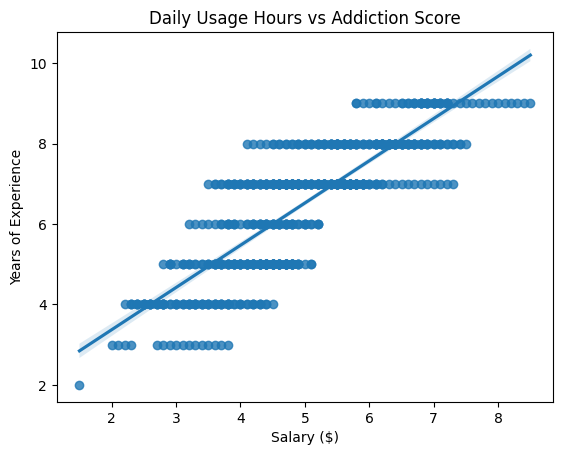

The correlation is: 0.832 indicating a strong positive correlation


In [103]:
#
corr_du_add = df_cleaned['avg_daily_usage_hours'].corr(df_cleaned['addicted_score'])

plt.subplot(2,2,1)
sns.regplot(data=df_cleaned, x="avg_daily_usage_hours", y="addicted_score", ci=95)
plt.title("Daily Usage Hours vs Addiction Score")
plt.xlabel("Salary ($)")
plt.ylabel("Years of Experience")
plt.show()

print(f"The correlation is: {round(corr_du_add,6)} indicating a strong positive correlation")

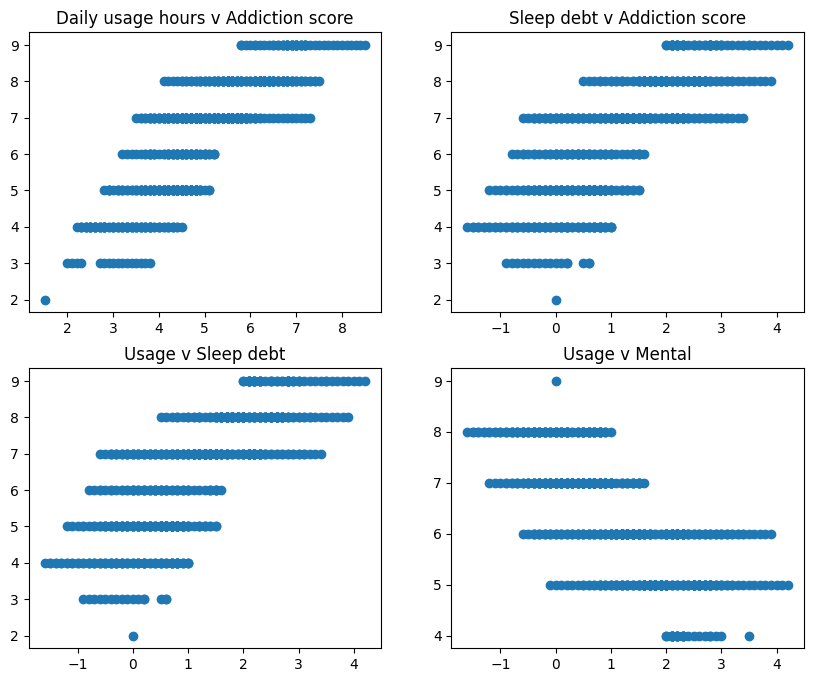

In [109]:
plt.subplots(2, 2, figsize =(10, 8))

axes[0,0].scatter(df_cleaned['avg_daily_usage_hours'],df_cleaned['addicted_score'])
axes[0,0].set_title("Daily usage hours v Addiction score")

axes[0,1].scatter(df_cleaned['sleep_debt'],df_cleaned['addicted_score'])
axes[0,1].set_title("Sleep debt v Addiction score")

axes[1,0].scatter(df_cleaned['sleep_debt'],df_cleaned['addicted_score'])
axes[1,0].set_title("Usage v Sleep debt")

axes[1,1].scatter(df_cleaned['sleep_debt'],df_cleaned['mental_health_score'])
axes[1,1].set_title("Usage v Mental")

plt.tight_layout
plt.show()